# Analysing the Cosine Map

## 1. Designing the System

The cosine-map is defined as:

$$\begin{aligned} x_{n+1}= & \frac{r}{4}\left((a+1) \cos \left[k\left(x_n-\frac{1}{2}\right)\right]-a\right), \\ & \text { with } k=2 \arccos \left(\frac{a}{a+1}\right), \quad a>0 .\end{aligned}$$

For $a = 1$ <br>
$$
\begin{aligned}
k&=2 \arccos \left(\frac{1}{2}\right) \\
&=\frac{2\pi}{3} \\
\end{aligned}
$$

Therefore the $a = 1$ cosine-map is defined as:
$$\begin{aligned} x_{n+1}= & \frac{r}{4}\left(2 \cos \left[\frac{2\pi}{3}\left(x_n-\frac{1}{2}\right)\right]-1\right).\end{aligned}$$

Lets intitalise the map ($r=4$) over 50 iterations with a random initial value.

In [5]:
import random
import math

def cosine_map(x_n,r):
    return (r/4) * (2 * math.cos((2*math.pi/3)*(x_n-0.5)) - 1)

# Initialise x with a random value between 0 and 1
x = random.random()

# Number of iterations
iterations = 50

# Constant in the logistic map equation
r = 4

# Iterate and apply the logistic map formula
for i in range(iterations):
    x = cosine_map(x, r)
    print(f"Iteration {i+1}: x = {x}")

Iteration 1: x = 0.3381050741674103
Iteration 2: x = 0.8861275111947424
Iteration 3: x = 0.3808736841529623
Iteration 4: x = 0.938073203942225
Iteration 5: x = 0.21561711509485204
Iteration 6: x = 0.6556127327292225
Iteration 7: x = 0.8947166156050728
Iteration 8: x = 0.3546254759249745
Iteration 9: x = 0.9080109339251139
Iteration 10: x = 0.31313696650989353
Iteration 11: x = 0.8487784654443351
Iteration 12: x = 0.4897085584818379
Iteration 13: x = 0.9995354282107205
Iteration 14: x = 0.0016848064047303435
Iteration 15: x = 0.006105563208188336
Iteration 16: x = 0.02206617124320487
Iteration 17: x = 0.07895098691644709
Iteration 18: x = 0.2714591964152373
Iteration 19: x = 0.775230666328417
Iteration 20: x = 0.6768147029343894
Iteration 21: x = 0.8644232719945875
Iteration 22: x = 0.44519147710369156
Iteration 23: x = 0.9868375576340886
Iteration 24: x = 0.04736205619567713
Iteration 25: x = 0.16661313781128784
Iteration 26: x = 0.5319447500361238
Iteration 27: x = 0.9955254001061118


We can run more iterations and disregard the first iterations as we allow the system to reach a steady state equilibrium (ignoring transient behaviour)

Analysing the last 500 $x$ values over 5000 iterations of the Cosine Map with $a=1$ we plot the time series for $r=2$ and $r=4$.

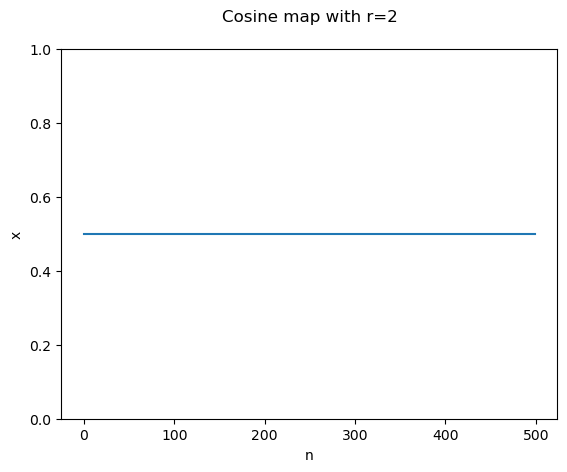

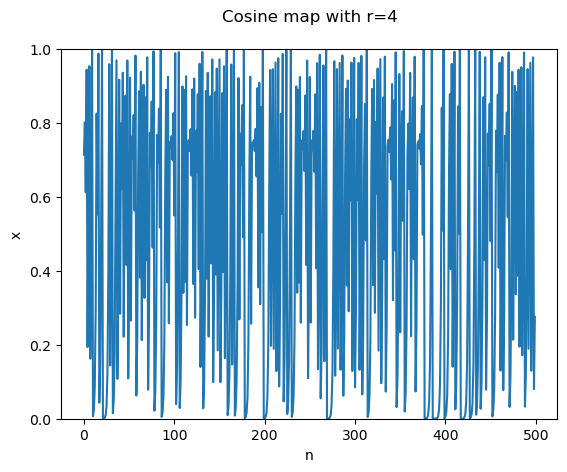

In [13]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Cosine map function with a=1
def cosine_map(x_n,r):
    return (r/4) * (2 * math.cos((2*math.pi/3)*(x_n-0.5)) - 1)


def plot_cosine_map(r):
    # Number of iterations
    iterations = 5000
    # Create data structure
    x = np.zeros(iterations)
    # Initialize x with a random value between 0 and 1
    x[0] = random.random()

    # Iterate and apply the logistic map formula
    for i in range(iterations-1):
        x[i+1] = cosine_map(x[i], r)

    # plot the timeseries removing the transient
    plt.figure()  # Create a new figure
    plt.plot(x[4500:])
    plt.xlabel('n')
    plt.ylabel('x')
    plt.title(f'Cosine map with r={r}', pad=20)  # Use an f-string to include the value of r in the title
    plt.ylim(0,1)
    plt.show()  # Display the plot

# Call the function with different values of r
plot_cosine_map(2)
plot_cosine_map(4)

Now, lets plot the possible values for $x$ (after initial transient behaviour) as a density on the vertical vs the parameter $r$ for $0 \leq r \leq 4.2$. In this case we plot a density for $x$ possibilities for 1000 discrete setps in $r$ over the region. <br>
Here, we see that the Cosine Map looks very similar to the logistic Map for $0 \leq r \leq 4$, however, we notice something interesting happening when we change the x scale to include negative values. We plot the x-axis in red for visability.

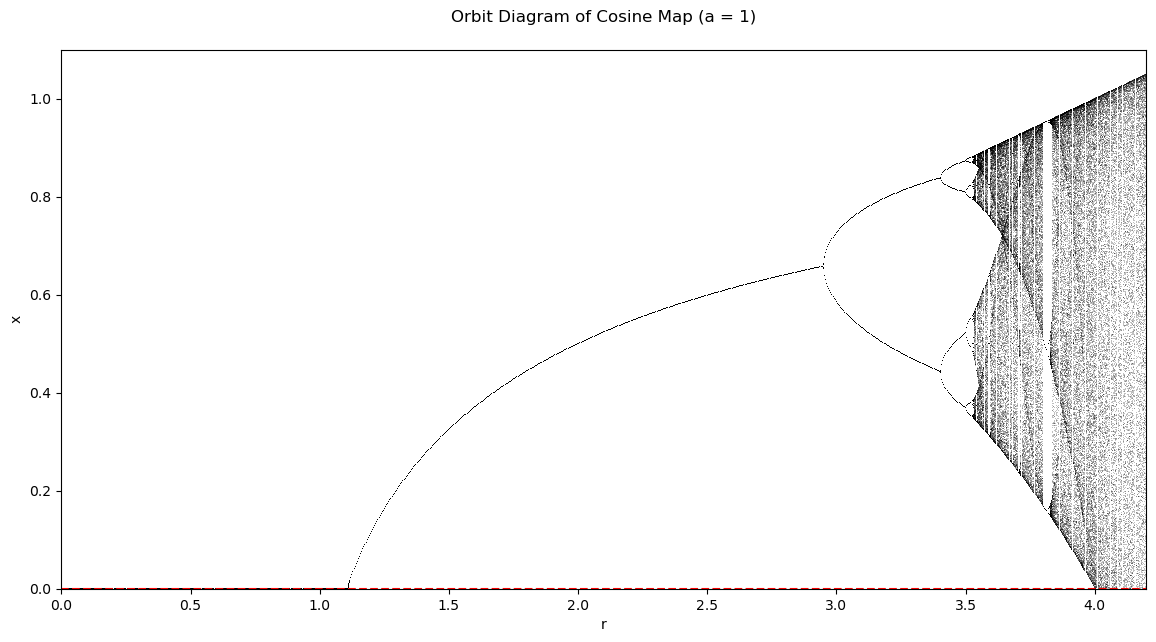

C:\Users\Steve J\AppData\Local\Temp\ipykernel_17456\4293864802.py:6: RuntimeWarning: overflow encountered in multiply
  return r * x_n * (1 - x_n)


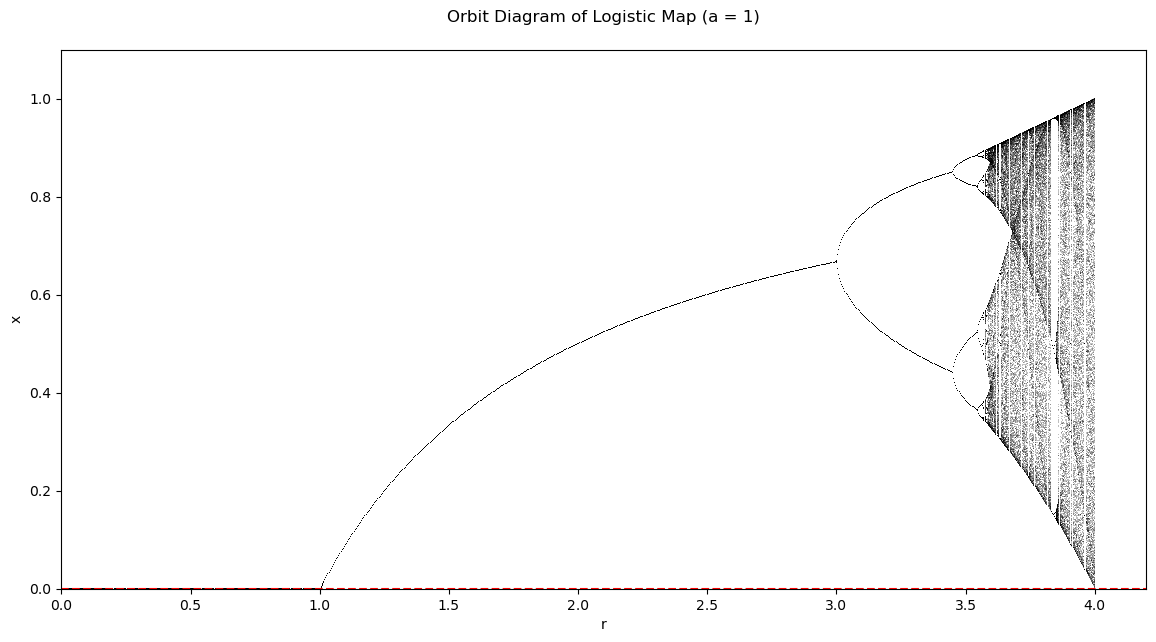

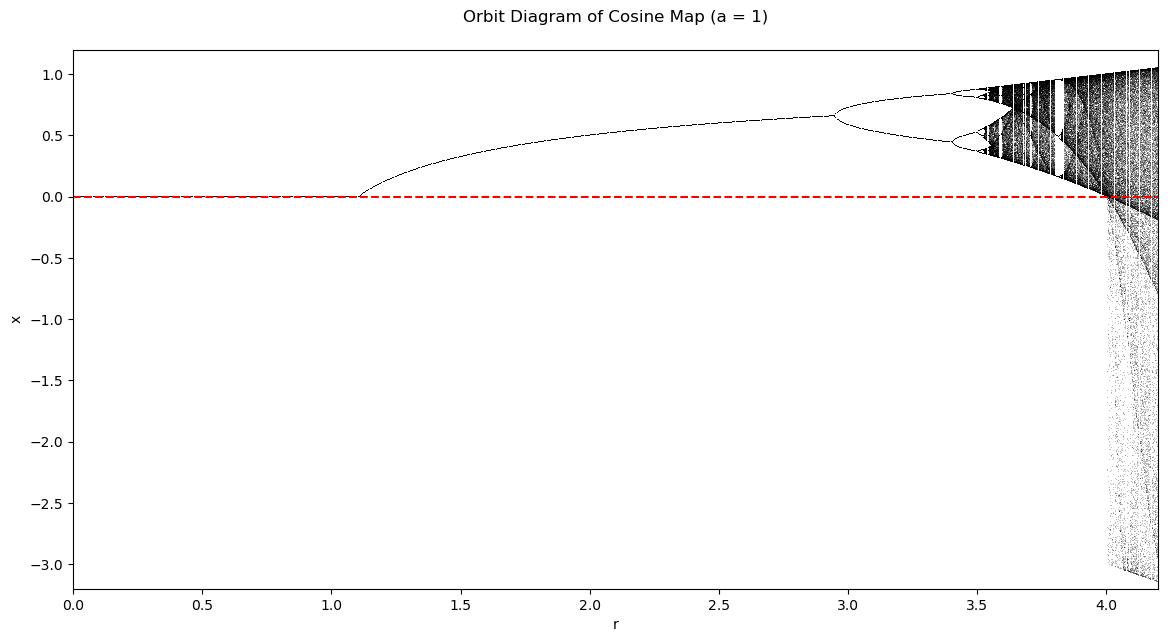

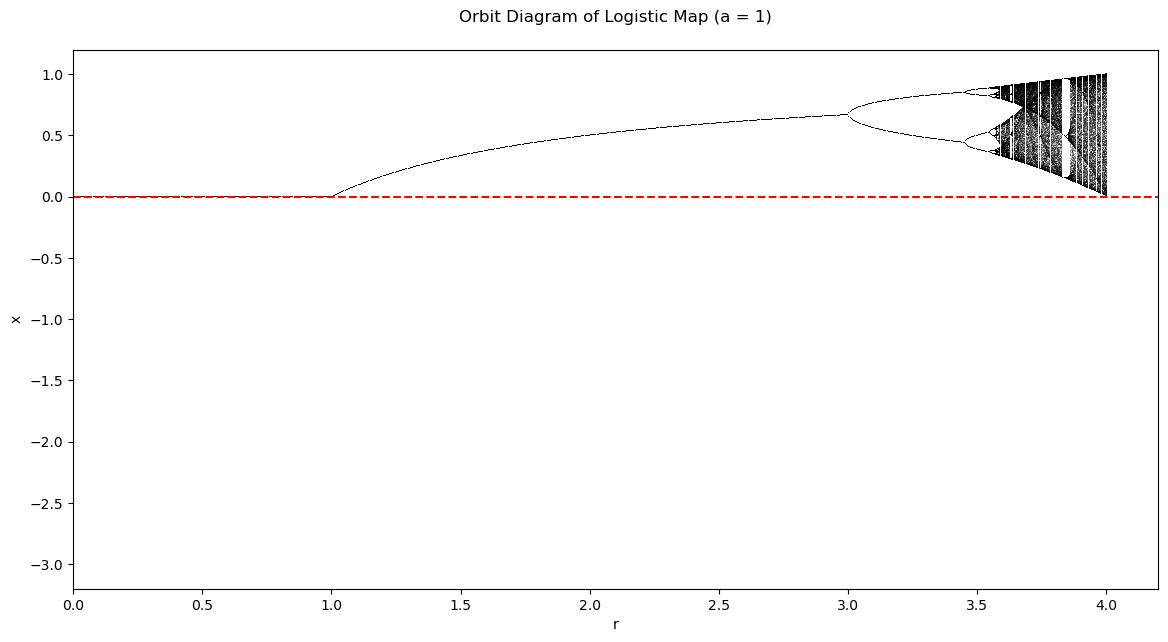

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic map function
def logistic_map(x_n, r):
    return r * x_n * (1 - x_n)

# Cosine map function with a=1
def cosine_map(x, r):
    return (r/4) * (2 * np.cos((2*np.pi/3)*(x-0.5)) - 1)

def plot_orbit_diagram(ymin, ymax, map_function, map_title):
    # Parameters
    r_values = np.linspace(0, 4.2, 1000)  # Range of r values
    iterations = 800  # Number of iterations
    last_n = 600  # Number of iterations to consider for each r value (disregard first 200 iterations of map)

    # Initial conditions
    x = 1e-5 * np.ones_like(r_values)

    # Iterate the map
    for _ in range(iterations):
        x = map_function(x, r_values)

    # Store the last few iterations for each r
    last_values = np.zeros((last_n, len(r_values)))
    for i in range(last_n):
        x = map_function(x, r_values)
        last_values[i, :] = x

    # Transpose last_values for plotting
    last_values = last_values.T

    # Plotting the orbit diagram
    plt.figure(figsize=(14, 7))
    plt.plot(r_values, last_values, ',k', alpha=0.25)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlim(0, 4.2)
    plt.ylim(ymin, ymax)
    plt.xlabel('r')
    plt.ylabel('x')
    plt.title(f"Orbit Diagram of {map_title} Map (a = 1)", pad=20)
    plt.show()

# Call the function with different y-axis limits
plot_orbit_diagram(0, 1.1, cosine_map, 'Cosine')
plot_orbit_diagram(0, 1.1, logistic_map, 'Logistic')
plot_orbit_diagram(-3.2, 1.2, cosine_map, 'Cosine')
plot_orbit_diagram(-3.2, 1.2, logistic_map, 'Logistic')

We see the Cosine map exhibits meaningful dynamics past  $r \geq 4$. In particular, negative values of $x$ appear in the dynamics of the system. This is interesting and it prompts us to explore what happens when we initialise with a negative $x$ value.

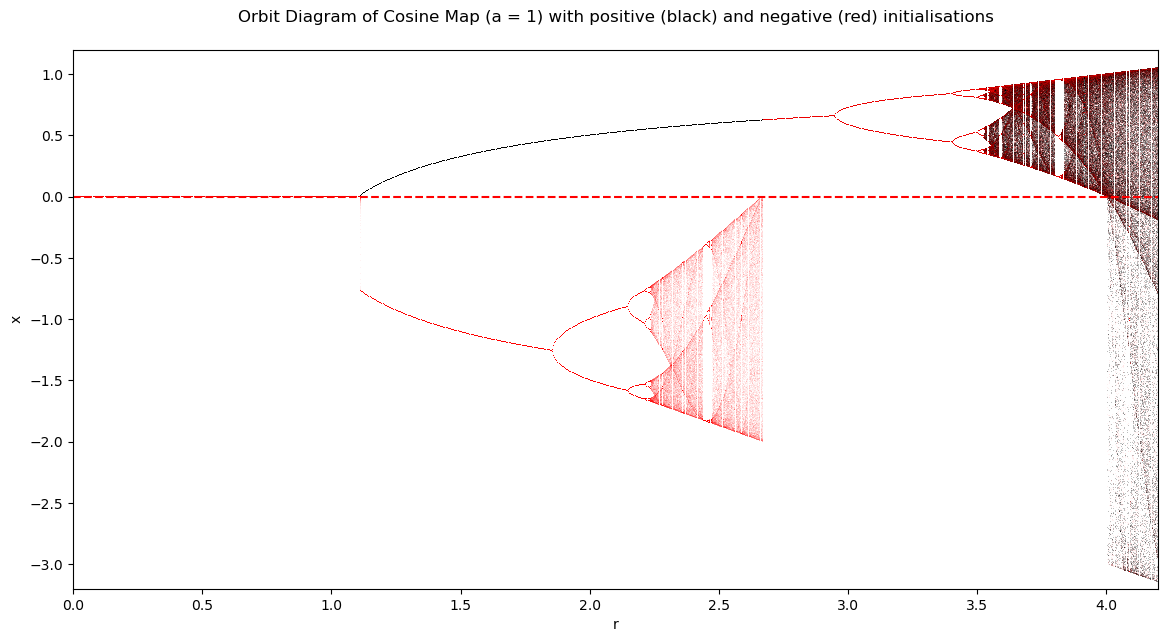

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Cosine map function with a=1
def cosine_map(x, r):
    return (r/4) * (2 * np.cos((2*np.pi/3)*(x-0.5)) - 1)

def plot_two_orbit_diagrams(xmin, xmax):
    # Parameters
    r_values = np.linspace(0, 4.2, 1000)  # Range of r values
    iterations = 800  # Number of iterations
    last_n = 600  # Number of iterations to consider for each r value (disregard first 200 iterations of map)

    # Initial conditions
    x_positive = 1e-5 * np.ones_like(r_values)
    x_negative = -1e-5 * np.ones_like(r_values)

    # Iterate the map for positive initial condition
    for _ in range(iterations):
        x_positive = cosine_map(x_positive, r_values)

    # Store the last few iterations for each r
    last_values_positive = np.zeros((last_n, len(r_values)))
    for i in range(last_n):
        x_positive = cosine_map(x_positive, r_values)
        last_values_positive[i, :] = x_positive

    # Iterate the map for negative initial condition
    for _ in range(iterations):
        x_negative = cosine_map(x_negative, r_values)

    # Store the last few iterations for each r
    last_values_negative = np.zeros((last_n, len(r_values)))
    for i in range(last_n):
        x_negative = cosine_map(x_negative, r_values)
        last_values_negative[i, :] = x_negative

    # Transpose last_values for plotting
    last_values_positive = last_values_positive.T
    last_values_negative = last_values_negative.T

    # Plotting the orbit diagram
    plt.figure(figsize=(14, 7))
    plt.plot(r_values, last_values_positive, ',k', alpha=0.25)
    plt.plot(r_values, last_values_negative, ',r', alpha=0.05)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlim(0, 4.2)
    plt.ylim(xmin, xmax)
    plt.xlabel('r')
    plt.ylabel('x')
    plt.title('Orbit Diagram of Cosine Map (a = 1) with positive (black) and negative (red) initialisations', pad=20)
    plt.show()

plot_two_orbit_diagrams(-3.2, 1.2)

## 2. Analysing the System

 ### 2.0 Master Orbit Diagram

Let's make a *master* interactive orbit diagram so we we can vary parameters and axis. We can use this to complete further analysis on the map. Note that the interaction can be slow at times. Reduce iterations and enlarge r-step to improve rendering.

In [76]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

def general_cosine_map(x, r, a):
    return (r / 4) * ((a + 1) * np.cos((2 * np.arccos(a / (a + 1))) * (x - 0.5)) - 1)

def a1_cosine_map(x, r, a=1):
    return (r / 4) * (2 * np.cos((2 * np.pi / 3) * (x - 0.5)) - 1)

def orbit_plot(map_func, n_iterations, r_step, a, x_min, x_max, r_min, r_max):
    r_values = np.linspace(r_min, r_max, int(1/r_step))  # Range of r values
    x_positive = 1e-5 * np.ones_like(r_values)
    x_negative = -1e-5 * np.ones_like(r_values)
    n_last = n_iterations - 200

    for _ in range(n_iterations):
        x_positive = map_func(x_positive, r_values, a)
        x_negative = map_func(x_negative, r_values, a)

    last_values_positive = np.zeros((n_last, len(r_values)))
    last_values_negative = np.zeros((n_last, len(r_values)))

    for i in range(n_last):
        x_positive = map_func(x_positive, r_values, a)
        x_negative = map_func(x_negative, r_values, a)
        last_values_positive[i, :] = x_positive
        last_values_negative[i, :] = x_negative

    plt.figure(figsize=(20, 10))
    for i in range(n_last):
        plt.plot(r_values, last_values_positive[i, :], ',k', alpha=500*r_step)
        plt.plot(r_values, last_values_negative[i, :], ',r', alpha=500*r_step)
    plt.axhline(0, color='b', linestyle='--')
    plt.axvline(0, color='b', linestyle='--')
    plt.xlim(r_min, r_max)
    plt.ylim(x_min, x_max)
    plt.xlabel('r')
    plt.ylabel('x')
    plt.title('Orbit Diagram of Cosine Map with positive (black) and negative (red) initialisations')
    plt.show()

# Create interactive widgets
n_iterations_slider = widgets.IntSlider(value=500, min=1, max=2000, step=1, description='n_iterations:')
r_step_slider = widgets.FloatLogSlider(value=0.0002, min=-4, max=-2, step=0.01, description='r_step:')
a_slider = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='a:')
x_min_slider = widgets.FloatSlider(value=-2, min=-8, max=0, step=0.1, description='x_min:')
x_max_slider = widgets.FloatSlider(value=2, min=0, max=8, step=0.1, description='x_max:')
r_max_slider = widgets.FloatSlider(value=4.2, min=0, max=10, step=0.1, description='r_max:')
r_min_slider = widgets.FloatSlider(value=-4.2, min=-10, max=-0, step=0.1, description='r_min:')

# Define the update function
def update_plot(n_iterations, r_step, a, x_min, x_max, r_min, r_max):
    map_func = a1_cosine_map if a == 1 else general_cosine_map
    orbit_plot(map_func, n_iterations, r_step, a, x_min, x_max, r_min, r_max)

# Use the interactive function to tie the update function to the sliders
interactive_plot = widgets.interactive(update_plot, n_iterations=n_iterations_slider, r_step=r_step_slider, a=a_slider, x_min=x_min_slider, x_max=x_max_slider, r_min=r_min_slider, r_max=r_max_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=500, description='n_iterations:', max=2000, min=1), FloatLogSlider(value…

### 2.1 Analysis of Lyapunov Exponent

The derivative of the  $a = 1$ cosine-map is defined as:

$$ x_{n+1} = -\frac{r\pi}{3} \sin\left(\frac{2\pi}{3}\left(x_n - \frac{1}{2}\right)\right) $$

The Lyapunov exponent $\lambda$ for a dynamical system with a map $f(x)$ and a parameter $r$ is defined as:

$$
\lambda(r) = \lim_{n \to \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log \left| \frac{df}{dx}(x_i) \right|
$$

where $x_i$ is the $i$-th iteration of the map, and $\frac{df}{dx}(x_i)$ is the derivative of the map at $x_i$. The Lyapunov exponent measures the average exponential divergence or convergence of nearby trajectories in the phase space, and is used to characterize the chaotic behavior of the system. A positive Lyapunov exponent typically indicates chaos, while a negative exponent indicates stability.

### 2.1.1 Positive Initialisation Lyapunov Analysis

C:\Users\Steve J\AppData\Local\Temp\ipykernel_17456\3939727977.py:21: RuntimeWarning: divide by zero encountered in log
  sum_lyapunov += np.log(np.abs(cosine_map_derivative(x, r)))


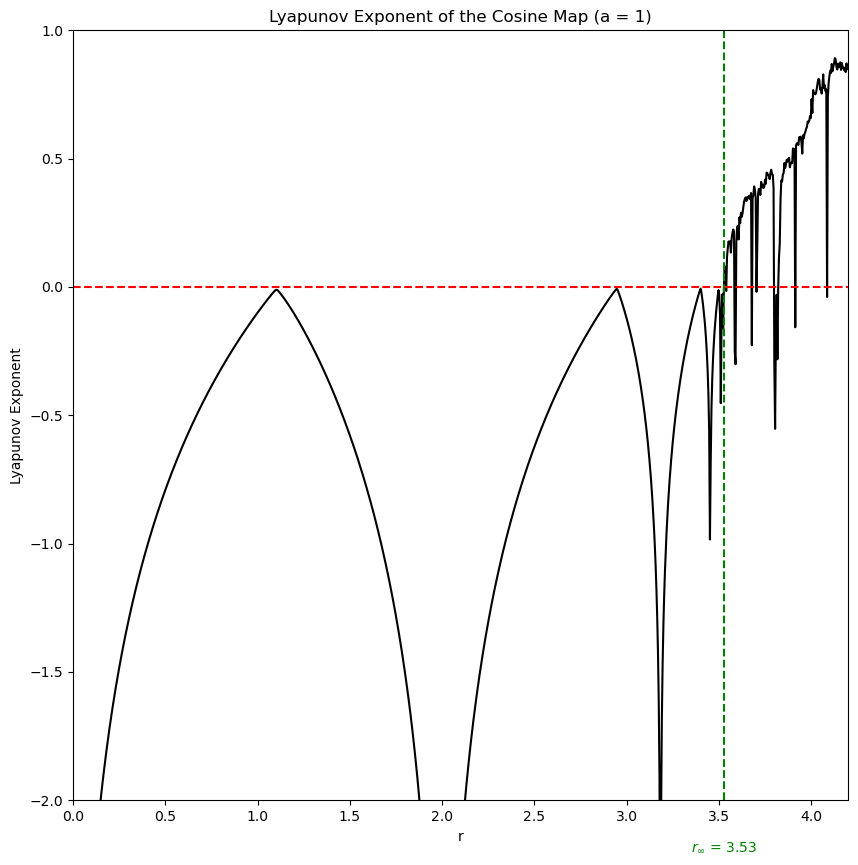

Range: 3.5273273273273276 - 3.5357357357357357
Range: 3.5441441441441444 - 3.5819819819819823
Range: 3.5945945945945947 - 3.6744744744744744
Range: 3.682882882882883 - 3.6996996996997
Range: 3.7081081081081084 - 3.7963963963963967
Range: 3.825825825825826 - 3.90990990990991
Range: 3.9183183183183186 - 4.082282282282282
Range: 4.090690690690691 - 4.2


In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Cosine map function with a=1
def cosine_map(x, r):
    return (r/4) * (2 * np.cos((2*np.pi/3)*(x-0.5)) - 1)

def cosine_map_derivative(x, r):
    return (-r*np.pi/3) * (np.sin((2*np.pi/3)*(x-0.5)))

# Parameters
r_values = np.linspace(0, 4.2, 1000)  # Range of r values
iterations = 1000  # Number of iterations
lyapunov_exponents = np.zeros_like(r_values)

for i, r in enumerate(r_values):
    x = 0.5  # Initial condition
    sum_lyapunov = 0
    for _ in range(iterations):
        x = cosine_map(x, r)
        sum_lyapunov += np.log(np.abs(cosine_map_derivative(x, r)))
    lyapunov_exponents[i] = sum_lyapunov / iterations

# Plotting the Lyapunov exponent
plt.figure(figsize=(10, 10))
plt.plot(r_values, lyapunov_exponents, '-k')
plt.axhline(0, color='r', linestyle='--')

# Initialize variables
start = None
ranges = []

# Iterate over Lyapunov exponents
for i, le in enumerate(lyapunov_exponents):
    if le > 0:
        if start is None:
            start = r_values[i]
    else:
        if start is not None:
            ranges.append((start, r_values[i-1]))
            start = None

# Add last range if it ended at the last value
if start is not None:
    ranges.append((start, r_values[-1]))

# Calculate the minimum of the ranges
r_infinity = min(r[0] for r in ranges)

# Plot the line
plt.axvline(x=r_infinity, color='g', linestyle='--')
plt.text(r_infinity, -2.2, r"$r_{\infty}$ = " + f"{round(r_infinity, 2)}", color='g', ha='center')

plt.xlim(0, 4.2)
plt.ylim(-2, 1)
plt.xlabel('r')
plt.ylabel('Lyapunov Exponent')
plt.title('Lyapunov Exponent of the Cosine Map (a = 1)')
plt.show()

# Print ranges
for r in ranges:
    print(f"Range: {r[0]} - {r[1]}")

Here we can see the Lyapunov Exponent is non-positive for $r_{\infty} \leq 3.53$ meaning che chaotic regime begins at $r \geq 3.53$. <br>
However, there are points for $r_{\infty} \leq 3.53$ where the Lyapunov Exponent dips below 0 beifly, meaning the system goes back to periodic behaviour for these berif $r$ values. We can see this on the orbit diagram where 'windows' of periodicity arise breifly for $r \geq 3.53$.

### 2.1.2 Birth of Stable Fixed Points/Cycles
For this analysis, we will jsut consider the positive initialisation case. The same logic is applied to the (earlier) period doubling in negative x. <br>
A stable fixed point or $2^n$ cycle is born at values $r_n$. We can estimate these points using the Lyapunov Funciton. <br>
They are super stable fixed points and exist when the Lyapunov function is 0. <br>
We estimate these points but doing a numerical analysis of the rnages where the lyapunov exponent is close to 0 and plot them. <br> 
We can also use this to numerically calculate Feigenbaum's counstant whic is the rate at which these period doublings occur: 
$$\delta_n = \frac{x_{n} - x_{n-1}}{x_{n+1} - x_n}$$
Theroretically , no matter the map this constant is always $\delta =  4.6692...$. <br>
Note that due to our numerical approximations, calucalted $\delta$'s are similar but not close to the theoretical and true value.

C:\Users\Steve J\AppData\Local\Temp\ipykernel_17456\4247293695.py:21: RuntimeWarning: divide by zero encountered in log
  sum_lyapunov += np.log(np.abs(cosine_map_derivative(x, r)))


Number of values in range 0: 116
Number of values in range 1: 82
Number of values in range 2: 34
Number of values in range 3: 14
Number of values in range 4: 320
Number of values in range 5: 452
r_0 = 1.1
r_1 = 2.94
r_2 = 3.4
r_3 = 3.5
r_4 = 3.66
delta_2 = 3.9854014598540153
delta_3 = 4.5666666666666655
delta_4 = 0.6181982098010159


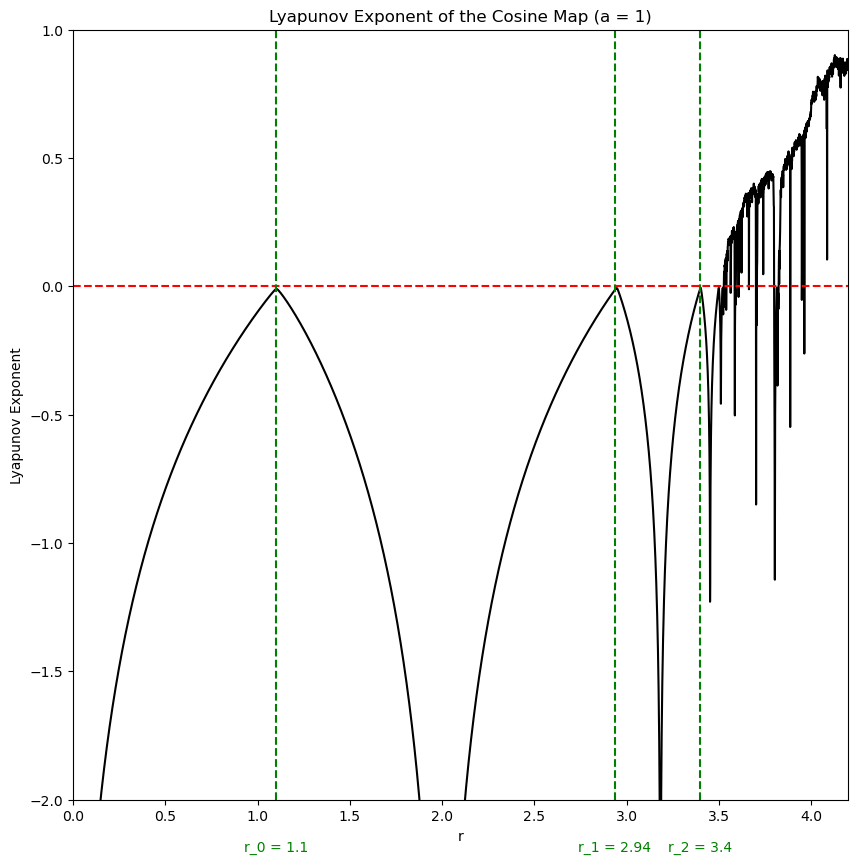

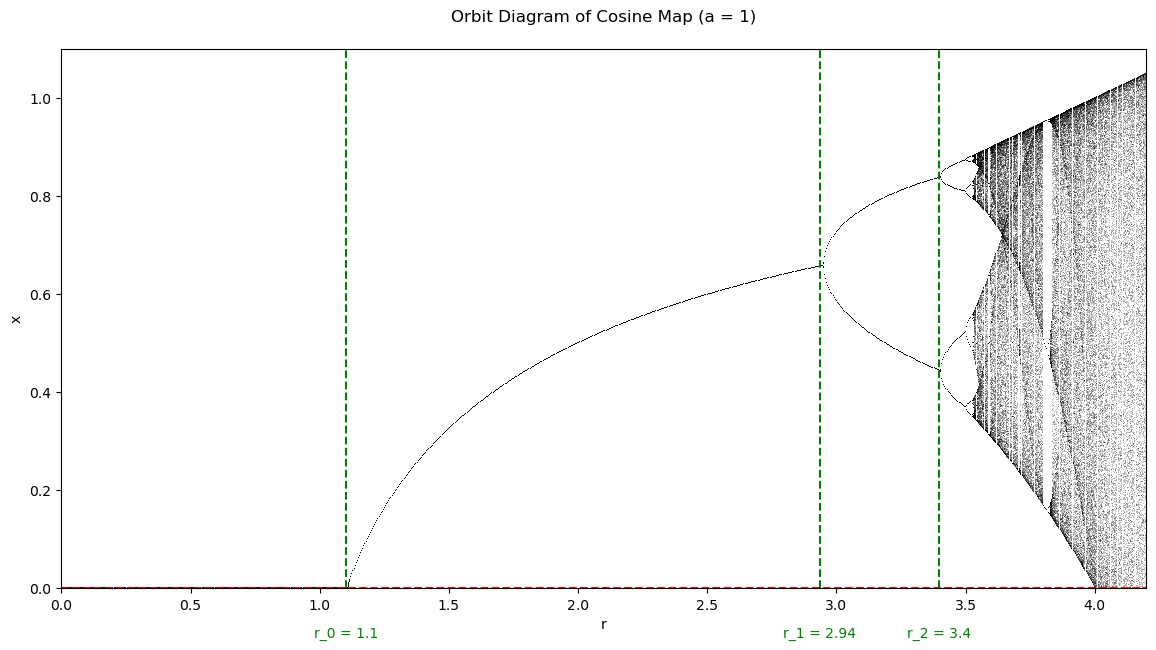

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Cosine map function with a=1
def cosine_map(x, r):
    return (r/4) * (2 * np.cos((2*np.pi/3)*(x-0.5)) - 1)

def cosine_map_derivative(x, r):
    return (-r*np.pi/3) * (np.sin((2*np.pi/3)*(x-0.5)))

# Parameters
r_values = np.linspace(0, 4.2, 5000)  # Range of r values
iterations = 1000  # Number of iterations
lyapunov_exponents = np.zeros_like(r_values)

for i, r in enumerate(r_values):
    x = 0.5  # Initial condition
    sum_lyapunov = 0
    for _ in range(iterations):
        x = cosine_map(x, r)
        sum_lyapunov += np.log(np.abs(cosine_map_derivative(x, r)))
    lyapunov_exponents[i] = sum_lyapunov / iterations

# Find ranges where Lyapunov exponent is more than -0.1
ranges = r_values[lyapunov_exponents > -0.05]

# Split into separate ranges
split_points = np.where(np.diff(ranges) > 0.01)[0] + 1
ranges_split = np.split(ranges, split_points)

# Print the number of values in each range
for i, r in enumerate(ranges_split):
    print(f"Number of values in range {i}: {len(r)}")

# Find middle of each range
roots = [np.mean(r) for r in ranges_split]
deltas = np.ones_like(roots)

# Print roots
num_roots = min(5, len(roots))
for i, r in enumerate(roots[:num_roots]):
    print(f"r_{i} = {round(r, 2)}")

# Calculate delta values
delta = []
if num_roots > 2:
    for i in range(2, num_roots):
        delta.append((roots[i-1] - roots[i-2]) / (roots[i] - roots[i-1]))

# Print delta values
for i, d in enumerate(delta):
    print(f"delta_{i+2} = {d}")

# Plotting the Lyapunov exponent
plt.figure(figsize=(10, 10))
plt.plot(r_values, lyapunov_exponents, '-k')
plt.axhline(0, color='r', linestyle='--')

# Plot and label roots
for i, r in enumerate(roots[:3]):
    plt.axvline(x=r, color='g', linestyle='--')
    plt.text(r, -2.2, f"r_{i} = {round(r, 2)}", color='g', ha='center')

plt.xlim(0, 4.2)
plt.ylim(-2, 1)
plt.xlabel('r')
plt.ylabel('Lyapunov Exponent')
plt.title('Lyapunov Exponent of the Cosine Map (a = 1)')
plt.show()

# Cosine map function with a=1
def cosine_map(x, r):
    return (r/4) * (2 * np.cos((2*np.pi/3)*(x-0.5)) - 1)

def plot_orbit_diagram(ymin, ymax, map_function, map_title):
    # Parameters
    r_values = np.linspace(0, 4.2, 1000)  # Range of r values
    iterations = 800  # Number of iterations
    last_n = 600  # Number of iterations to consider for each r value (disregard first 200 iterations of map)

    # Initial conditions
    x = 1e-5 * np.ones_like(r_values)

    # Iterate the map
    for _ in range(iterations):
        x = map_function(x, r_values)

    # Store the last few iterations for each r
    last_values = np.zeros((last_n, len(r_values)))
    for i in range(last_n):
        x = map_function(x, r_values)
        last_values[i, :] = x

    # Transpose last_values for plotting
    last_values = last_values.T

    # Plotting the orbit diagram
    plt.figure(figsize=(14, 7))
    plt.plot(r_values, last_values, ',k', alpha=0.25)
    plt.axhline(0, color='r', linestyle='--')

    # Plot and label roots
    for i, r in enumerate(roots[:3]):
        plt.axvline(x=r, color='g', linestyle='--')
        plt.text(r, -0.1, f"r_{i} = {round(r, 2)}", color='g', ha='center')
        
    plt.xlim(0, 4.2)
    plt.ylim(ymin, ymax)
    plt.xlabel('r')
    plt.ylabel('x')
    plt.title(f"Orbit Diagram of {map_title} Map (a = 1)", pad=20)
    plt.show()

plot_orbit_diagram(0, 1.1, cosine_map, 'Cosine')

Here we can see the negative initialisation approaches the chaotic regime via period doubling at $r_{\infty 1}=2.24$ and $r_{\infty 2}=3.53$, compared to the positive initialisation case that only approaches the chaotic regime at $r_{\infty 2}=3.53$.<br><br>
Combing this with the last graph, we can see that $r_n$'s asymptotically approach $r_{\infty}$, which resembles the period doubling route to chaos.

### 2.1.3 Negative Initialisation Lyapunov Analysis

Lets do the same Lyapunov analysis for the negative initialisation case and compare it to the positive case. 

C:\Users\Steve J\AppData\Local\Temp\ipykernel_17456\868927449.py:25: RuntimeWarning: divide by zero encountered in log
  sum_lyapunov_pos += np.log(np.abs(cosine_map_derivative(x_pos, r)))
C:\Users\Steve J\AppData\Local\Temp\ipykernel_17456\868927449.py:26: RuntimeWarning: divide by zero encountered in log
  sum_lyapunov_neg += np.log(np.abs(cosine_map_derivative(x_neg, r)))


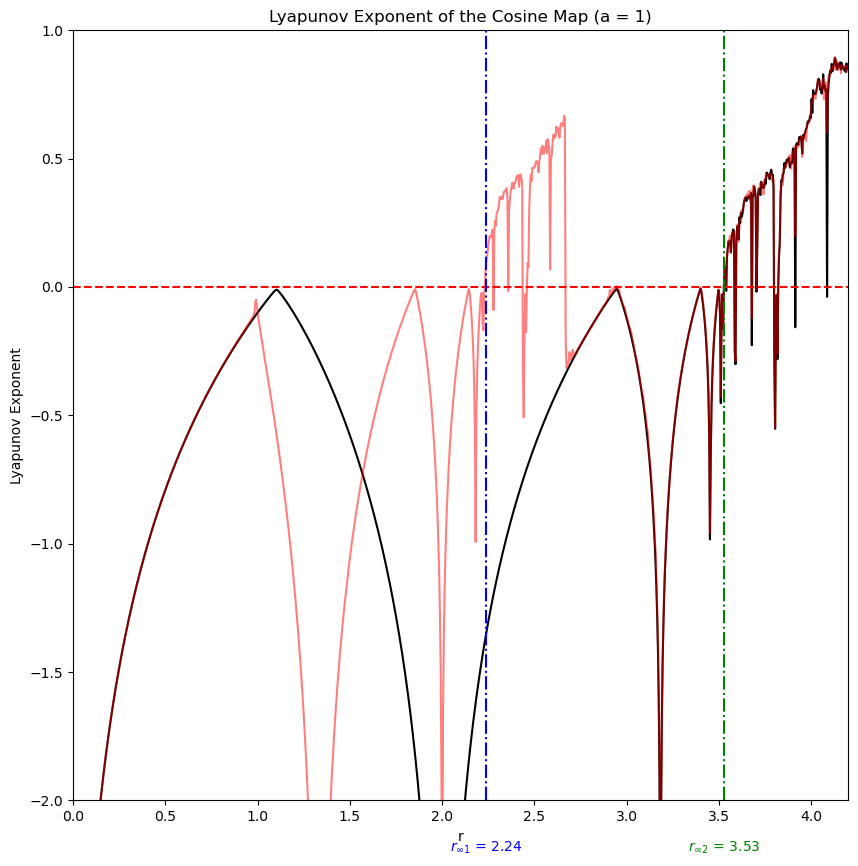

Range for x_pos: 3.5273273273273276 - 3.5357357357357357
Range for x_pos: 3.5441441441441444 - 3.5819819819819823
Range for x_pos: 3.5945945945945947 - 3.6744744744744744
Range for x_pos: 3.682882882882883 - 3.6996996996997
Range for x_pos: 3.7081081081081084 - 3.7963963963963967
Range for x_pos: 3.825825825825826 - 3.90990990990991
Range for x_pos: 3.9183183183183186 - 4.082282282282282
Range for x_pos: 4.090690690690691 - 4.2
Range for x_neg: 2.2366366366366366 - 2.2744744744744745
Range for x_neg: 2.282882882882883 - 2.3543543543543546
Range for x_neg: 2.3627627627627628 - 2.4342342342342342
Range for x_neg: 2.463663663663664 - 2.6654654654654655
Range for x_neg: 2.947147147147147 - 2.947147147147147
Range for x_neg: 3.5273273273273276 - 3.5819819819819823
Range for x_neg: 3.5945945945945947 - 3.6744744744744744
Range for x_neg: 3.682882882882883 - 3.6996996996997
Range for x_neg: 3.7081081081081084 - 3.7963963963963967
Range for x_neg: 3.8216216216216217 - 4.2


In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Cosine map function with a=1
def cosine_map(x, r):
    return (r/4) * (2 * np.cos((2*np.pi/3)*(x-0.5)) - 1)

def cosine_map_derivative(x, r):
    return (-r*np.pi/3) * (np.sin((2*np.pi/3)*(x-0.5)))

# Parameters
r_values = np.linspace(0, 4.2, 1000)  # Range of r values
iterations = 1000  # Number of iterations
lyapunov_exponents_pos = np.zeros_like(r_values)
lyapunov_exponents_neg = np.zeros_like(r_values)

for i, r in enumerate(r_values):
    x_pos = 0.5  # Positive initial condition
    x_neg = -0.5  # Negative initial condition
    sum_lyapunov_pos = 0
    sum_lyapunov_neg = 0
    for _ in range(iterations):
        x_pos = cosine_map(x_pos, r)
        x_neg = cosine_map(x_neg, r)
        sum_lyapunov_pos += np.log(np.abs(cosine_map_derivative(x_pos, r)))
        sum_lyapunov_neg += np.log(np.abs(cosine_map_derivative(x_neg, r)))
    lyapunov_exponents_pos[i] = sum_lyapunov_pos / iterations
    lyapunov_exponents_neg[i] = sum_lyapunov_neg / iterations

# Plotting the Lyapunov exponent
plt.figure(figsize=(10, 10))
plt.plot(r_values, lyapunov_exponents_pos, '-k')
plt.plot(r_values, lyapunov_exponents_neg, '-r', alpha=0.5)
plt.axhline(0, color='r', linestyle='--')

# Initialize variables
start_pos = None
start_neg = None
ranges_pos = []
ranges_neg = []

# Iterate over Lyapunov exponents
for i, le_pos in enumerate(lyapunov_exponents_pos):
    if le_pos > 0:
        if start_pos is None:
            start_pos = r_values[i]
    else:
        if start_pos is not None:
            ranges_pos.append((start_pos, r_values[i-1]))
            start_pos = None

for i, le_neg in enumerate(lyapunov_exponents_neg):
    if le_neg > 0:
        if start_neg is None:
            start_neg = r_values[i]
    else:
        if start_neg is not None:
            ranges_neg.append((start_neg, r_values[i-1]))
            start_neg = None

# Add last range if it ended at the last value
if start_pos is not None:
    ranges_pos.append((start_pos, r_values[-1]))
if start_neg is not None:
    ranges_neg.append((start_neg, r_values[-1]))

# Calculate the minimum of the ranges
r_infinity_pos = min(r[0] for r in ranges_pos)
r_infinity_neg = min(r[0] for r in ranges_neg)

# Plot the lines
plt.axvline(x=r_infinity_pos, color='g', linestyle='-.')  # Dash-dot line
plt.text(r_infinity_pos, -2.2, r"$r_{\infty 2}$ = " + f"{round(r_infinity_pos, 2)}", color='g', ha='center')

plt.axvline(x=r_infinity_neg, color=(0, 0, 1), linestyle='-.')  # Dash-dot line
plt.text(r_infinity_neg, -2.2, r"$r_{\infty 1}$ = " + f"{round(r_infinity_neg, 2)}", color=(0, 0, 1), ha='center')

plt.xlim(0, 4.2)
plt.ylim(-2, 1)
plt.xlabel('r')
plt.ylabel('Lyapunov Exponent')
plt.title('Lyapunov Exponent of the Cosine Map (a = 1)')
plt.show()

# Print ranges
for r in ranges_pos:
    print(f"Range for x_pos: {r[0]} - {r[1]}")
for r in ranges_neg:
    print(f"Range for x_neg: {r[0]} - {r[1]}")

### 2.3 Cobweb Diagram
A cobweb diagram is a visualisation of the map under a specific initial contion and specific parameters, the map is displayed as a curve and an interation of the map is the conversion of an output of the map to an input of the map (visualised by the line of identity).
Lets create a *master* Cobweb Diagram so we can analyse the diagram under different parameters

In [97]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

def draw_cobweb(map_func, x_0, n_iterations, r, a, x_min, x_max):
    x = np.zeros(n_iterations)
    y = np.zeros(n_iterations)
    x_vals = np.linspace(x_min, x_max, int(x_max-x_min) * 100)
    x[0] = x_0

    # Plot the map and identity
    plt.plot(x_vals, x_vals, color='blue', linestyle='--')
    y_vals = map_func(x_vals, r, a)
    plt.plot(x_vals, y_vals, color='blue', label='Map Function')
    plt.xlabel('$x_{n}$')
    plt.ylabel('$x_{n+1}$')
    plt.xlim(x_min, x_max)
    plt.ylim(x_min, x_max)
    plt.title('Cobweb Diagram')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    # Apply the map iteratively
    line_segments = []
    for i in range(n_iterations - 1):
        y[i] = map_func(x[i], r, a)
        x[i+1] = y[i]
        line_segments.append(([x[i], y[i]], [y[i], y[i]]))
        line_segments.append(([y[i-1], y[i-1]], [y[i-1], y[i]]))

    # Plot all the line segments at once
    for segment in line_segments:
        plt.plot(*segment, color='red', linewidth=0.5)

    plt.plot([x[0], x[0]], [0, x[1]], color='red', linewidth=0.5)

def general_cosine_map(x, r, a):
    return (r/4) * ((a + 1) * np.cos((2*np.arccos(a / (a + 1)))*(x-0.5)) - 1)

def a1_cosine_map(x, r, a=1):
    return (r/4) * (2 * np.cos((2*np.pi/3)*(x-0.5)) - 1)

# Create interactive widgets
x_0_slider = widgets.FloatSlider(value=0.2, min=-1, max=1, step=0.01, description='x_0:')
n_iterations_slider = widgets.IntSlider(value=20, min=1, max=100, step=1, description='n_iterations:')
r_value_slider = widgets.FloatSlider(value=3.5, min=0, max=4, step=0.01, description='r:')
a_slider = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='a:')
x_min_slider = widgets.FloatSlider(value=0, min=-10, max=0, step=0.1, description='x_min:')
x_max_slider = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='x_max:')

# Define the update function
def update_plot(x_0, n_iterations, r, a, x_min, x_max):
    map = a1_cosine_map if a == 1 else general_cosine_map
    draw_cobweb(map, x_0, n_iterations, r, a, x_min, x_max)

# Use the interactive function to tie the update function to the sliders
interactive_plot = widgets.interactive(update_plot, x_0=x_0_slider, n_iterations=n_iterations_slider, r=r_value_slider, a=a_slider, x_min=x_min_slider, x_max=x_max_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=0.2, description='x_0:', max=1.0, min=-1.0, step=0.01), IntSlider(valu…